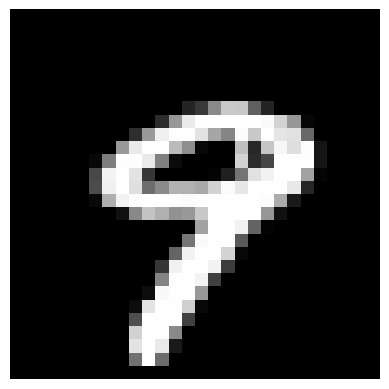

In [1]:
import pandas as pd
from PIL import Image, ImageOps
import numpy as np
import os
import random
import matplotlib.pyplot as plt


csv_file = r"C:\Users\Aaditya\Desktop\ipcv_pracs\data\mnist_test.csv"  # Replace with the provided file name
data = pd.read_csv(csv_file)

labels = data.iloc[:, 0]  # First column: Labels
pixels = data.iloc[:, 1:]  # Remaining columns: Pixel data

# Directory to save images
output_dir = r"C:\Users\Aaditya\Desktop\ipcv_pracs\mnist_images"
os.makedirs(output_dir, exist_ok=True)

for idx, (label, pixel_values) in enumerate(zip(labels, pixels.values)):
    image_array = pixel_values.reshape(28, 28).astype(np.uint8)
    img = Image.fromarray(image_array)
    img.save(f"{output_dir}/{label}_{idx}.png")
    if idx >= 10: 
        break


image_files = [f for f in os.listdir(output_dir) if f.endswith(".png")]
random_image_file = random.choice(image_files)
random_image_path = os.path.join(output_dir, random_image_file)
random_img = Image.open(random_image_path)


plt.imshow(random_img, cmap="gray")
plt.axis('off')  
plt.show()




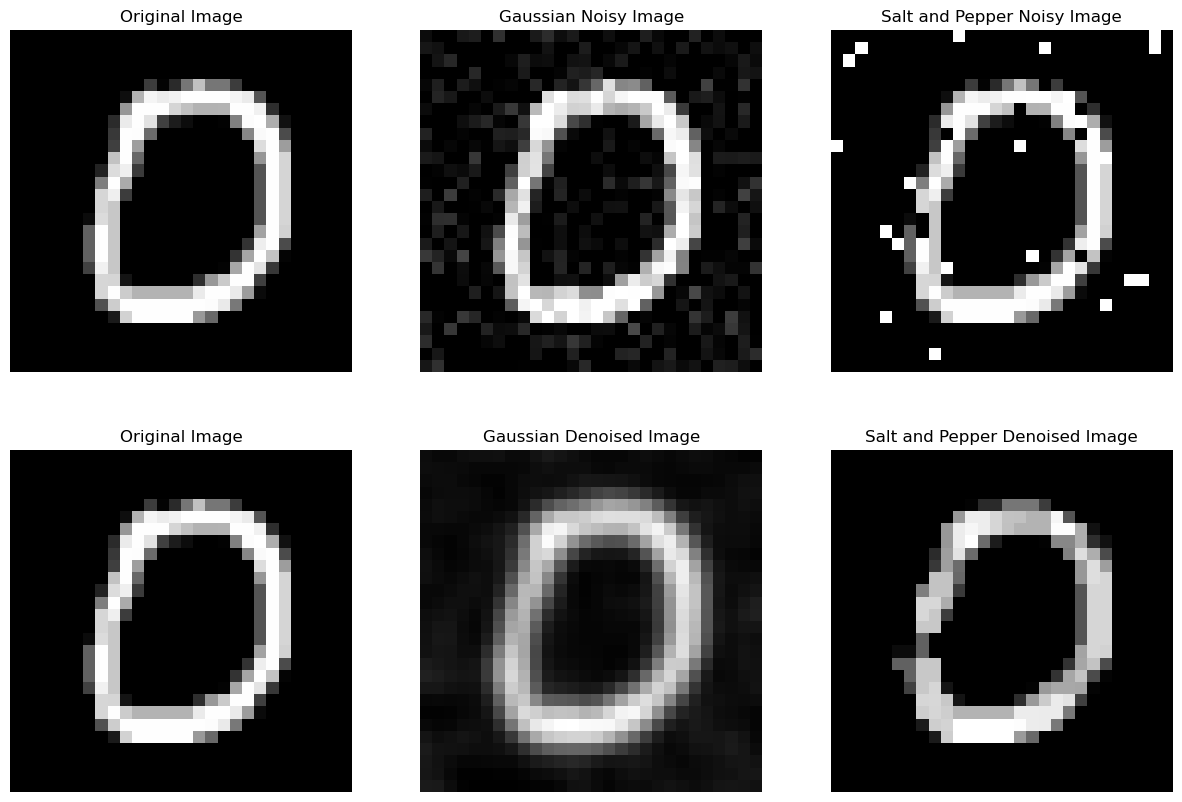

In [ ]:
from skimage.util import random_noise
from scipy.ndimage import gaussian_filter, median_filter

# Function to add Gaussian noise
def add_gaussian_noise(image, mean=0, var=0.01):
    noisy_image = random_noise(image, mode='gaussian', mean=mean, var=var)
    noisy_image = (255 * noisy_image).astype(np.uint8)
    return noisy_image

# Function to add salt and pepper noise
def add_salt_and_pepper_noise(image, amount=0.05, salt_vs_pepper=0.5):
    noisy_image = random_noise(image, mode='s&p', amount=amount, salt_vs_pepper=salt_vs_pepper)
    noisy_image = (255 * noisy_image).astype(np.uint8)
    return noisy_image

# Function to remove Gaussian noise using Gaussian filter
def remove_gaussian_noise(image, sigma=1):
    filtered_image = gaussian_filter(image, sigma=sigma)
    return filtered_image

# Function to remove salt and pepper noise using median filter
def remove_salt_and_pepper_noise(image, size=3):
    filtered_image = median_filter(image, size=size)
    return filtered_image

# Add Gaussian noise to the image
gaussian_noisy_image = add_gaussian_noise(image_array)

# Add salt and pepper noise to the image
sp_noisy_image = add_salt_and_pepper_noise(image_array)

# Remove Gaussian noise using Gaussian filter
gaussian_denoised_image = remove_gaussian_noise(gaussian_noisy_image)

# Remove salt and pepper noise using median filter
sp_denoised_image = remove_salt_and_pepper_noise(sp_noisy_image)

# Display the images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes[0, 0].imshow(image_array, cmap='gray')
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(gaussian_noisy_image, cmap='gray')
axes[0, 1].set_title('Gaussian Noisy Image')
axes[0, 1].axis('off')

axes[0, 2].imshow(sp_noisy_image, cmap='gray')
axes[0, 2].set_title('Salt and Pepper Noisy Image')
axes[0, 2].axis('off')

axes[1, 0].imshow(image_array, cmap='gray')
axes[1, 0].set_title('Original Image')
axes[1, 0].axis('off')

axes[1, 1].imshow(gaussian_denoised_image, cmap='gray')
axes[1, 1].set_title('Gaussian Denoised Image')
axes[1, 1].axis('off')

axes[1, 2].imshow(sp_denoised_image, cmap='gray')
axes[1, 2].set_title('Salt and Pepper Denoised Image')
axes[1, 2].axis('off')

plt.show()